<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators 

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'app_wau.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 'ab_experiment.csv',
 'sample-sales-data.csv',
 'online_retail_II.xlsx',
 'cookie_cats.csv',
 'mock_sales_data.csv',
 'sales_data_with_stores.csv',
 '1_customers_dataset.csv',
 'ecommerce-data.csv',
 'lead_conversion.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'mall_customers.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_order_payments_dataset.csv',
 'groceries.csv',
 'sales.csv',
 'bz_data_analyis.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'match_result_test.csv',
 'sample_data']

In [7]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
#df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a)).lower().lstrip('_') for a in df.columns]
df.columns = [re.sub(' ', '_', a).lower() for a in df.columns]
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], format = '%m/%d/%y')
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df['effective_to_date'].agg(['min', 'max'])

min   2011-01-01
max   2011-02-28
Name: effective_to_date, dtype: datetime64[ns]

In [27]:
cnt_days = df[['effective_to_date']].assign(
    days = df['effective_to_date'].apply(lambda x : x - datetime.strptime('2011-01-01', '%Y-%m-%d')).dt.days,
    weekday = df['effective_to_date'].dt.weekday
    )
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
cnt_days['weekday'] = cnt_days['weekday'].apply(lambda x : list_weekday.get(x,x))
cnt_days.sort_values(['days']).head()

,effective_to_date,days,weekday
3451,2011-01-01,0,sat
4044,2011-01-01,0,sat
3993,2011-01-01,0,sat
7846,2011-01-01,0,sat
7847,2011-01-01,0,sat


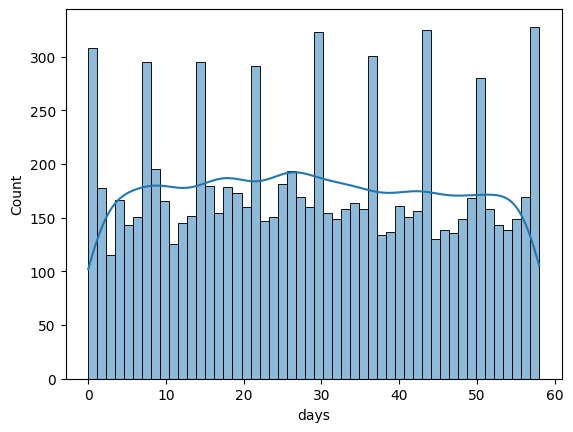

In [22]:
sns.histplot(data = cnt_days, x = 'days', kde = True, bins = 50)
plt.show()

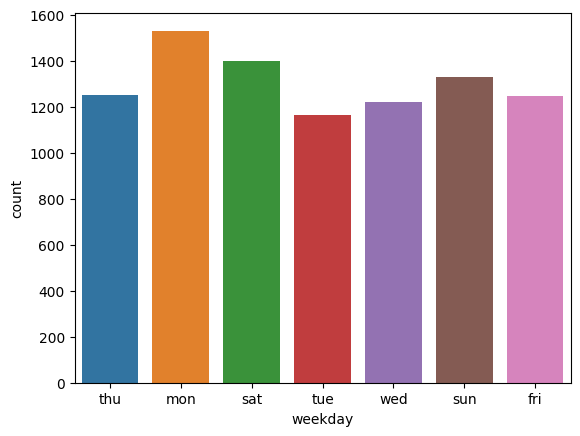

In [25]:
sns.countplot(data = cnt_days, x = 'weekday')
plt.show()

In [29]:
cnt_days.groupby(['days','weekday'])['effective_to_date'].count().reset_index(name = 'cnt')

,days,weekday,cnt
0,0,sat,148
1,1,sun,160
2,2,mon,178
3,3,tue,115
4,4,wed,167
5,5,thu,143
6,6,fri,151
7,7,sat,149
8,8,sun,146
9,9,mon,195


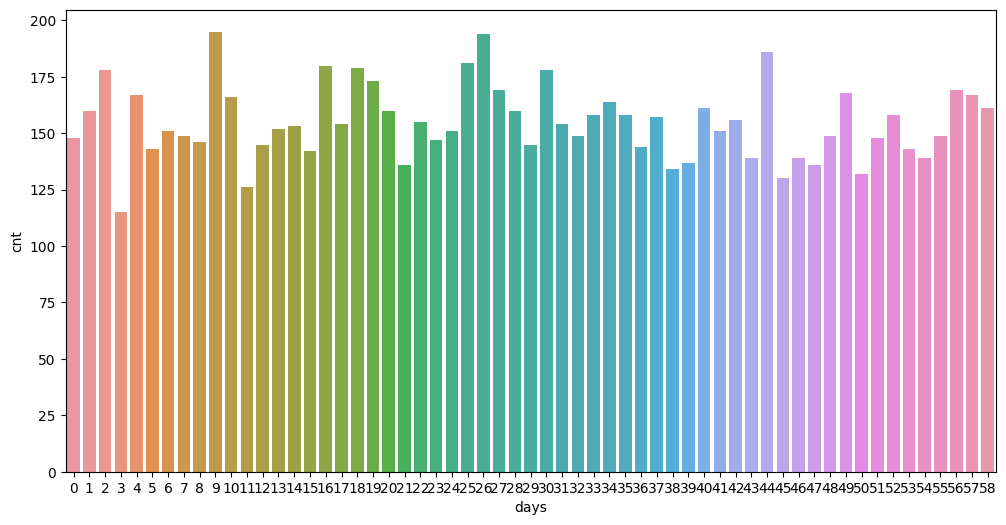

In [31]:
plt.figure(figsize = [12,6])
sns.barplot(data = cnt_days.groupby(['days','weekday'])['effective_to_date'].count().reset_index(name = 'cnt'),
            x = 'days', y = 'cnt'
            )
plt.show()

# Iterators

In [32]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [33]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [34]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}